In [114]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

mush_df = pd.read_csv('diabetes_data_upload.csv')
mush_df_encoded = pd.get_dummies(mush_df)



In [116]:
mush_df.info()
mush_df.dtypes
df=mush_df
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0


In [117]:
df.shape



(520, 17)

In [43]:
df.groupby('class').size()


class
Negative    200
Positive    320
dtype: int64

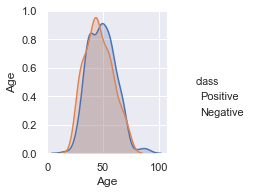

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [112]:
sns.pairplot(data=df, hue='class')
plt.show()
df.describe()

In [66]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x1=df.iloc[:,1:-1]

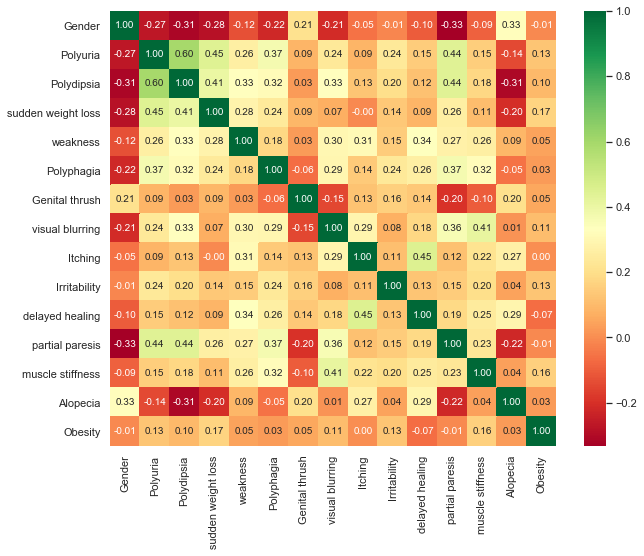

In [119]:
import seaborn as sns
sns.heatmap(
    data=x1.corr(),
    annot=True,
    fmt='.2f',
    cmap='RdYlGn'
)
fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.show()

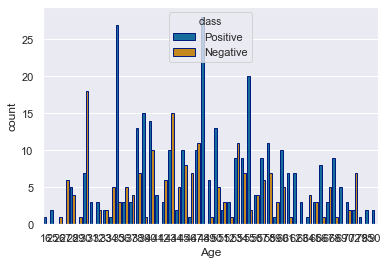

In [110]:
sns.countplot(x='Age',hue='class',data=df, palette='colorblind', edgecolor=sns.color_palette('dark',n_colors=1))

In [67]:
x1


,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes
1,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No
2,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No
3,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No
4,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No
516,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No
517,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes
518,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No


In [123]:
from sklearn.preprocessing import LabelEncoder

In [124]:
Le_x=LabelEncoder()

In [125]:
x1=x1.apply(LabelEncoder().fit_transform)

In [126]:
x1

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [136]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.33, random_state=44, shuffle =True)
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [138]:
y_pred=dtc.predict(X_test)
dtc_predict_proba = dtc.predict_proba(X_test)[:, 1]

In [130]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[68,  7],
       [ 6, 91]], dtype=int64)

In [131]:
from sklearn.metrics import classification_report

In [140]:
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('AUC: {:.2f}%'.format(roc_auc_score(y_test, dtc_predict_proba) * 100))
print('Classification report:\n\n', classification_report(y_test, y_pred))
print('Training set score: {:.2f}%'.format(dtc.score(X_train, y_train) * 100))
print('Testing set score: {:.2f}%'.format(dtc.score(X_test, y_test) * 100))

Accuracy: 92.44%
AUC: 93.92%
Classification report:

               precision    recall  f1-score   support

    Negative       0.92      0.91      0.91        75
    Positive       0.93      0.94      0.93        97

    accuracy                           0.92       172
   macro avg       0.92      0.92      0.92       172
weighted avg       0.92      0.92      0.92       172

Training set score: 99.71%
Testing set score: 92.44%


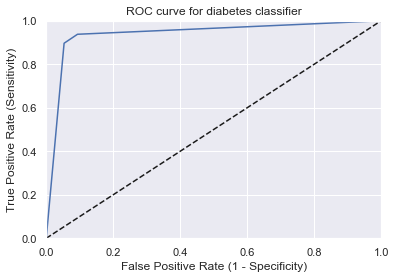

In [154]:

fpr, tpr, thresholds = roc_curve(y_test, dtc_predict_proba, pos_label='Positive')

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 10
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

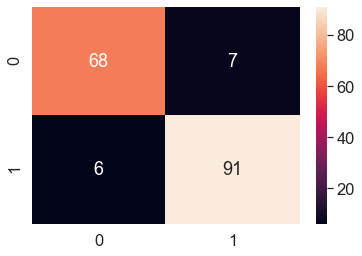

In [157]:
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes =True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [158]:
from dtreeviz.trees import *

For comparison, Some of the models target needs to be enumerated to 0, 1 from positve or negative

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')
%matplotlib inline

In [92]:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.33, random_state=44, shuffle =True)
        
    

In [ ]:
GBRModel = GradientBoostingRegressor(n_estimators=100,max_depth=2,learning_rate = 1.5 ,random_state=33)
GBRModel.fit(X_train, y_train)
print('GBRModel Train Score is : ' , GBRModel.score(X_train, y_train))
print('GBRModel Test Score is : ' , GBRModel.score(X_test, y_test))
y_pred = GBRModel.predict(X_test)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

In [48]:
SVRModel = SVR(C = 1.0 ,epsilon=0.1,kernel = 'rbf') # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(X_train, y_train)
print('SVRModel Train Score is : ' , SVRModel.score(X_train, y_train))
print('SVRModel Test Score is : ' , SVRModel.score(X_test, y_test))
y_pred = SVRModel.predict(X_test)

SVRModel Train Score is :  0.9817039367949263
SVRModel Test Score is :  0.9274349555348048


In [49]:
DecisionTree = DecisionTreeRegressor( max_depth=3,random_state=33)
DecisionTree.fit(X_train, y_train)
print('DecisionTreeRegressor Train Score is : ' , DecisionTree.score(X_train, y_train))
print('DecisionTreeRegressor Test Score is : ' , DecisionTree.score(X_test, y_test))
y_pred = DecisionTree.predict(X_test)

DecisionTreeRegressor Train Score is :  0.9631240941127717
DecisionTreeRegressor Test Score is :  0.9601144081397933


In [54]:
SVRModelLin = SVR(C = 1.0 ,epsilon=0.1,kernel = 'linear') # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModelLin.fit(X_train, y_train)
print('SVRModel Train Score is : ' , SVRModelLin.score(X_train, y_train))
print('SVRModel Test Score is : ' , SVRModelLin.score(X_test, y_test))
y_pred = SVRModelLin.predict(X_test)

SVRModel Train Score is :  0.9982034490107443
SVRModel Test Score is :  0.9981379684343233


In [55]:
SVRModelpoly = SVR(C = 1.0 ,epsilon=0.1,kernel = 'poly') 
SVRModelpoly.fit(X_train, y_train)
print('SVRModel Train Score is : ' , SVRModelpoly.score(X_train, y_train))
print('SVRModel Test Score is : ' , SVRModelpoly.score(X_test, y_test))
y_pred = SVRModelpoly.predict(X_test)

SVRModel Train Score is :  0.9329261320574689
SVRModel Test Score is :  0.875957905825307


In [58]:
accuracies = {'Model': ['GBRModel', 'SVRModel', 'DecisionTree',  'SVRModelLin', 'SVRModelpoly'],
     'accuracy' : [GBRModel.score(X_test, y_test), SVRModel.score(X_test, y_test), DecisionTree.score(X_test, y_test),
                   SVRModelLin.score(X_test, y_test),SVRModelpoly.score(X_test, y_test) ]}

result = pd.DataFrame(data = accuracies)
result

,Model,accuracy
0,GBRModel,0.983956
1,SVRModel,0.875958
2,DecisionTree,0.960114
3,SVRModelLin,0.998138
4,SVRModelpoly,0.875958


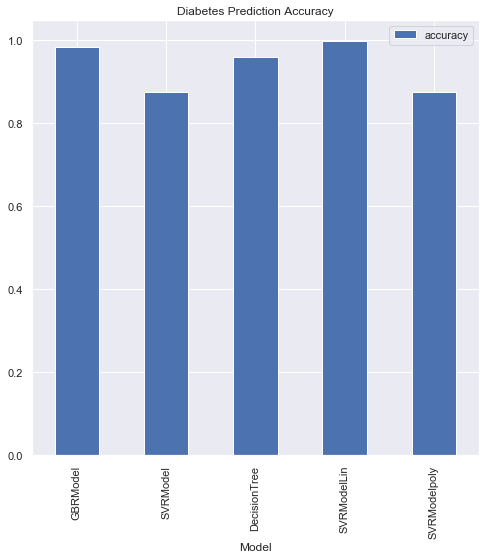

In [61]:
result.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), title='Diabetes Prediction Accuracy', 
               sort_columns=True)

In [66]:
from sklearn.metrics import roc_curve, auc
SVRModelLin = SVR(C = 1.0 ,epsilon=0.1,kernel = 'linear') # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModelLin.fit(X_train, y_train)




SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [67]:
print('SVRModel Train Score is : ' , SVRModelLin.score(X_train, y_train))
print('SVRModel Test Score is : ' , SVRModelLin.score(X_test, y_test))
y_pred = SVRModelLin.predict(X_test)

SVRModel Train Score is :  0.9982034490107443
SVRModel Test Score is :  0.9981379684343233
